# Mini Project #4
##### 레드 와인 품질 예측


In [103]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime

# Data Analyzing

In [104]:

import pandas as pd
WINE_DATA_PATH = "../datasets/winequality-red.csv"

def load_wine_data(wine_path=WINE_DATA_PATH):
    return pd.read_csv(wine_path)

wine = load_wine_data()
wine = wine.fillna(wine.mean())
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [105]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [106]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


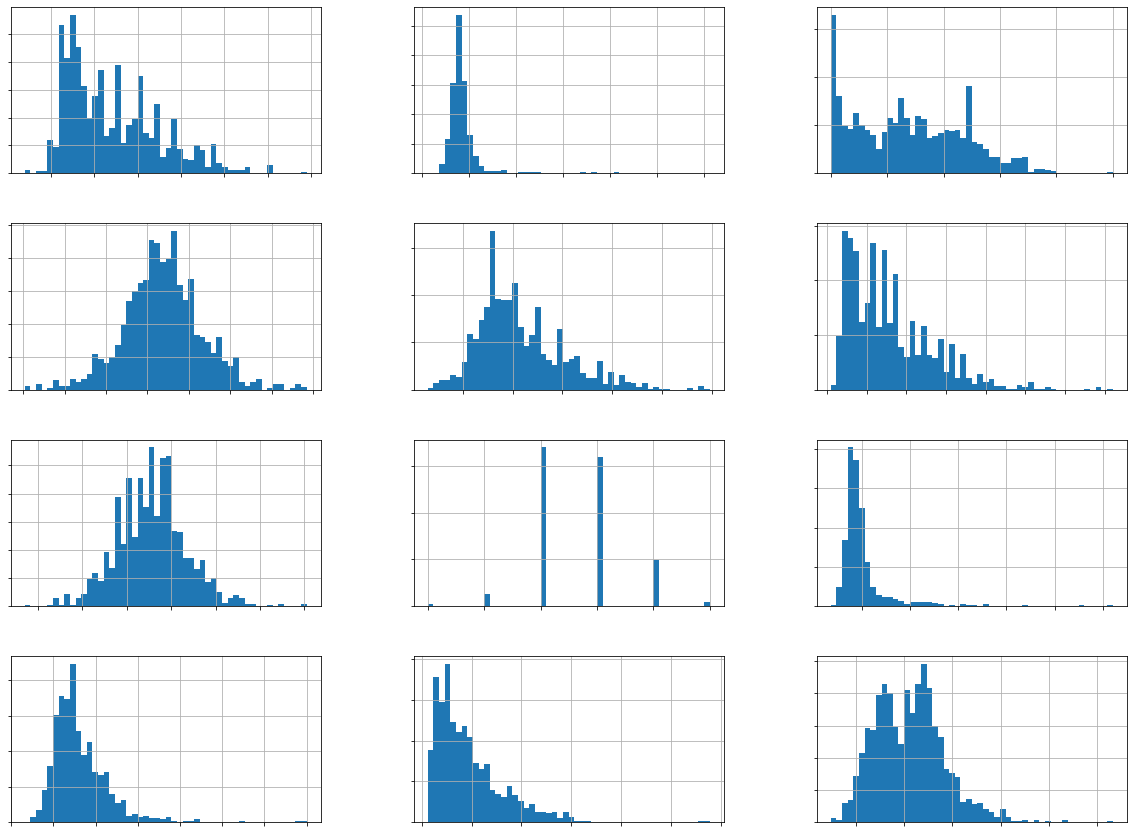

In [107]:
%matplotlib inline
wine.hist(bins=50, figsize=(20, 15))
plt.show()

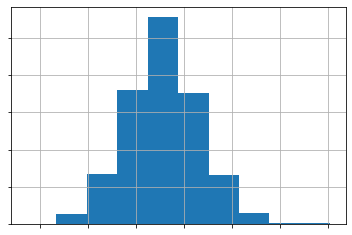

In [108]:
wine["pH"].hist()

In [109]:
corr_matrix = wine.corr()

In [110]:
corr_matrix["quality"].sort_values(ascending=True)

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Saving figure scatter_matrix_plot


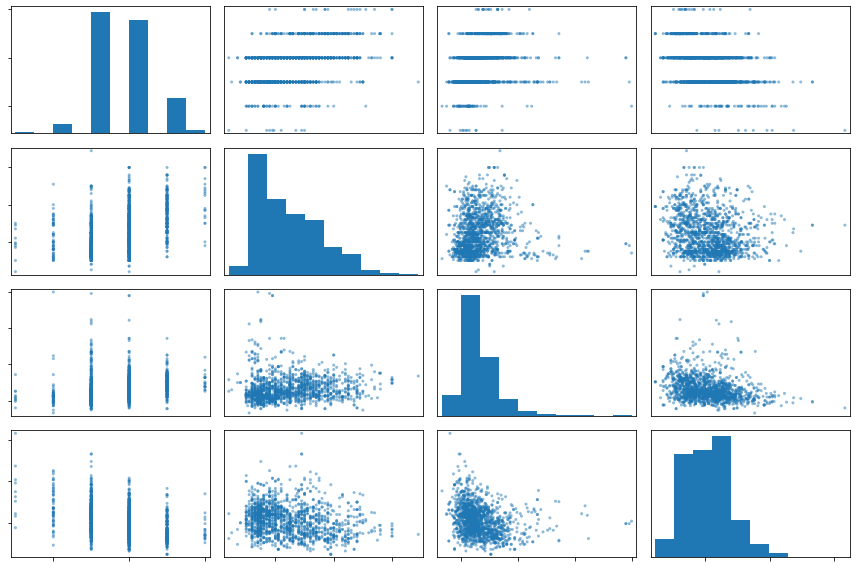

In [111]:
from pandas.plotting import scatter_matrix

attributes = ["quality", "alcohol", "sulphates",
              "volatile acidity"]
scatter_matrix(wine[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure alcohol_vs_quality_scatterplot


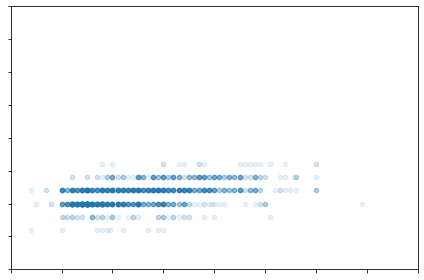

In [112]:
wine.plot(kind="scatter", x="alcohol", y="quality",
             alpha=0.1)
plt.axis([8, 16, 0, 20])
save_fig("alcohol_vs_quality_scatterplot")

# Feature Engineering

#### 와인 품질의 결정에 Alcohol, Acid 등이 많은 영향을 미치는데, 여기서 이 연관성을 이용하여 새로운 특성을 만들어 냄

In [113]:
wine["balance"] = wine["alcohol"] - wine["sulphates"] - wine["volatile acidity"]
corr_matrix = wine.corr()
corr_matrix["quality"].sort_values(ascending=True)

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
balance                 0.483355
quality                 1.000000
Name: quality, dtype: float64

#### 새로 만든 특성이 상관관계가 가장 큼

Saving figure alcohol_vs_quality_scatterplot


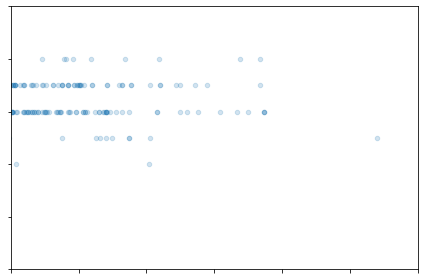

In [114]:
wine.plot(kind="scatter", x="balance", y="quality",
             alpha=0.2)
plt.axis([11, 14, 0, 10])
save_fig("alcohol_vs_quality_scatterplot")

#### 잔여 설탕은 와인 품질과 상관관계가 없을 것 같아서 제거함

In [115]:
temp = wine.copy().drop("residual sugar", axis=1)

# Evaluating Models

In [116]:
wine = temp.drop("quality", axis=1)
wine_labels = temp["quality"].copy()

In [117]:
seed = 42
num_folds = KFold(n_splits=10, shuffle=True, random_state=seed)
scoring = 'neg_mean_squared_error'

#### 대표적인 예측(회귀) 모델들의 성능 평가

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor(random_state=seed, max_depth=6, min_samples_leaf=5, min_samples_split=12, n_estimators=100)))
models.append(('ET', ExtraTreesRegressor(random_state=seed, max_depth=80, min_samples_leaf=10, min_samples_split=30, n_estimators=400)))
models.append(('AB', AdaBoostRegressor(random_state=seed)))
models.append(('GBM', GradientBoostingRegressor(random_state=seed )))
results = []
names = []
metrics = []

In [ ]:
for name, model in models:
    cv_results = cross_val_score(model, wine, wine_labels, cv=num_folds, scoring=scoring)
    cv_scores = np.sqrt(-cv_results)
    results.append(cv_scores)
    names.append(name)
    metrics.append(cv_scores.mean())
    msg = "%s: %f (%f)" % (name, cv_scores.mean(), cv_scores.std())
    print(msg)
print ('Average metrics (RMSE) from all models:',numpy.mean(metrics))

#### Random Forest Regressor 모델의 RMSE 가 가장 낮은 것을 알 수 있음
#### Gradient Boosting 의 성능을 시험해보기 위해 XGBRegressor 사용

In [16]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, max_depth=7)

In [17]:
cv_results = cross_val_score(xgb_reg, wine, wine_labels, cv=num_folds, scoring=scoring)
cv_results = np.sqrt(-cv_results)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(cv_results)

Scores: [0.55183878 0.55376784 0.60111794 0.55943177 0.58052173 0.6080939
 0.54103095 0.61861324 0.534523   0.55320298]
Mean: 0.5702142120364615
Standard deviation: 0.028245229131368548


In [18]:
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, max_depth=80)

cv_results = cross_val_score(xgb_reg, wine, wine_labels, cv=num_folds, scoring=scoring)
cv_results = np.sqrt(-cv_results)
    
display_scores(cv_results)

Scores: [0.551609   0.56899198 0.60644422 0.52375521 0.57059322 0.59495163
 0.52373453 0.58434828 0.53982427 0.53331223]
Mean: 0.5597564555255443
Standard deviation: 0.028253449831638428


#### XGBRegressor 의 RMSE 성능이 더 좋아, 하이퍼 파라미터 튜닝 시도

# Hyper Parameters Tuning

In [19]:
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [10, 50, 75, 100],
    'learning_rate':[None, 0.08, 0.1, 0.2],
    'gamma':[0,1,2]
}

estimator = XGBRegressor()
grid_search = GridSearchCV(estimator=estimator,
                          param_grid=param_grid,
                          cv=num_folds,
                          n_jobs=-1)
grid_search.fit(wine, wine_labels)

grid_search.best_params_

{'gamma': 0, 'learning_rate': 0.08, 'max_depth': 50, 'n_estimators': 100}

In [20]:
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, max_depth=50)

cv_results = cross_val_score(xgb_reg, wine, wine_labels, cv=num_folds, scoring=scoring)
cv_results = np.sqrt(-cv_results)
    
display_scores(cv_results)

Scores: [0.551609   0.56899198 0.60644422 0.52375521 0.57059322 0.59495163
 0.52373453 0.58434828 0.53982427 0.53331223]
Mean: 0.5597564555255443
Standard deviation: 0.028253449831638428


#### 세부적인 튜닝을 통해 가장 최적의 하이퍼 파라미터를 탐색

In [21]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [20, 30, 40, 50]
}

estimator = XGBRegressor()
grid_search = GridSearchCV(estimator=estimator,
                          param_grid=param_grid,
                          cv=num_folds,
                          n_jobs=-1)
grid_search.fit(wine, wine_labels)

grid_search.best_params_

{'max_depth': 30, 'n_estimators': 100}

In [118]:
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, max_depth=30)

cv_results = cross_val_score(xgb_reg, wine, wine_labels, cv=num_folds, scoring=scoring)
cv_results = np.sqrt(-cv_results)
    
display_scores(cv_results)

Scores: [0.55059879 0.56609024 0.60562889 0.52351067 0.57190532 0.59495163
 0.52498313 0.57517287 0.52848098 0.53411257]
Mean: 0.5575435082026945
Standard deviation: 0.02821693606080794


### 최종 RMSE : 0.5575435082026945